<a href="https://colab.research.google.com/github/arthurt1/Avalia-o-de-Modelos-de-ML/blob/ryan/Avalia%C3%A7%C3%A3o_de_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nomes da Equipe:



*   Arthur Thomé Costa - 565756
*   Rodrigo Sousa Barbosa - 566581
*   Ryan dos Santos Oliveira - 565120




# Objetivos:
*   Aplicar diferentes métricas de avaliação para classificação, regressão e clusterização
*  Comparar o desempenho de múltiplos algoritmos
* Interpretar corretamente os resultados das métricas
* Identificar problemas como overfitting e underfitting

# Pequeno resumo do trabalho e resultados:

Preparação do Ambiente Virtual:

In [30]:
## Importação das bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.datasets import load_iris, load_wine, fetch_openml
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Parte 1: CLASSIFICAÇÃO


---


Dataset: *Iris Dataset*

Descrição: Classificação de espécies de flores Iris (Setosa, Versicolor, Virginica) baseado em medidas das sépalas e pétalas.

## Tarefa 1.1: Implementação e Avaliação Básica

Implemente o classificador K-Nearest Neighbors (KNN) com k=3 e k=5

### a) Divida o dataset em 70% treino e 30% teste. Para cada modelo, calcule:

- Acurácia
- Precisão (macro e micro)
- Recall (macro e micro)
- F1-score (macro e micro)
- Matriz de confusão

In [ ]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

print(df.head())

### b) Qual modelo obteve melhor desempenho geral? Justifique sua resposta considerando múltiplas métricas.

In [ ]:
nao sei

### C) Existe alguma classe que é mais difícil de classificar? Como você identificou isso?

## Tarefa 1.2: Validação Cruzada

### a)Implemente validação cruzada k-fold com k=5 para todos os modelos da Tarefa 1.1.

### b)Compare os resultados da validação cruzada com a divisão simples treino/teste. O que você observa?

### c) Calcule o desvio padrão da acurácia para cada modelo. O que isso indica sobre a estabilidade do modelo?

## Tarefa 1.3: Curvas ROC e AUC

### a) Para o problema binário (Setosa vs. Não-Setosa), plote as curvas ROC para os três modelos.

### b) Calcule a área sob a curva (AUC) para cada modelo.

### c) Interprete os resultados: qual modelo tem melhor capacidade de discriminação?

# Parte 2: REGRESSÃO

---

Dataset: *Boston Housing (ou California Housing)*

Descrição: Predição de preços de imóveis baseado em características socioeconômicas e geográficas.

## Tarefa 2.1: Múltiplos Modelos de Regressão

Implemente o modelo. K-Nearest Neighbors Regressor (k=3 e k=7)

### a) Divida o dataset em 70% treino e 30% teste. Para cada modelo, calcule:

- Erro Médio Absoluto (MAE)
- Erro Quadrático Médio (MSE)
- Raiz do Erro Quadrático Médio (RMSE)
- Coeficiente de Determinação (R²)
- Erro Percentual Absoluto Médio (MAPE)

### b) Crie um gráfico de dispersão comparando valores preditos vs. valores reais para cada modelo.

### c) Qual modelo apresentou melhor desempenho? Por quê?

## Tarefa 2.2: Análise de Resíduos

### a) Para os três melhores modelos, plote o gráfico de resíduos (erro vs. valores preditos).

### b) Há algum padrão nos resíduos? O que isso indica sobre o modelo?

### c) Calcule e plote o histograma dos resíduos. Eles seguem uma distribuição aproximadamente normal?

# Parte 3: CLUSTERIZAÇÃO


---


Dataset: *Wine Dataset*

Descrição: Análise química de vinhos de três cultivares diferentes na Itália.

## Tarefa 3.1: K-Means

In [ ]:


print("--- Verificação de Qualidade dos Dados ---")

wine = load_wine()
X = wine.data

## Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Checar valores faltantes
missing_values_count = np.isnan(X).sum()
print(f"Total de valores faltantes no dataset: {missing_values_count}")
if missing_values_count > 0:
    print("Por favor, verifique a origem dos dados, pois há valores faltantes.")
else:
    print("Nenhum valor faltante encontrado no dataset.")

# 2. Detecção de Outliers usando o método IQR nos dados escalados (X_scaled)
outlier_indices = []
outlier_count_per_feature = []

for i in range(X_scaled.shape[1]): # Itera por cada coluna (feature)
    feature_data = X_scaled[:, i]

    Q1 = np.percentile(feature_data, 25)
    Q3 = np.percentile(feature_data, 75)
    IQR = Q3 - Q1

    # Definir limites para outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar outliers
    feature_outliers = (feature_data < lower_bound) | (feature_data > upper_bound)
    num_outliers = np.sum(feature_outliers)

    if num_outliers > 0:
        # Tenta obter o nome da feature, se disponível
        feature_name = wine.feature_names[i] if 'wine' in locals() and hasattr(wine, 'feature_names') else f'feature_{i}'
        outlier_count_per_feature.append(f"  - {feature_name}: {num_outliers} outliers")
        # Adiciona os índices das linhas onde foram encontrados outliers
        outlier_indices.extend(np.where(feature_outliers)[0].tolist())

if outlier_count_per_feature:
    print(f"\nPotenciais outliers encontrados (método IQR):")
    for msg in outlier_count_per_feature:
        print(msg)
    unique_outlier_indices = sorted(list(set(outlier_indices)))
    print(f"Linhas com potenciais outliers (primeiros 10 índices, se houver muitos): {unique_outlier_indices[:10]}...")
else:
    print(f"\nNenhum outlier significativo encontrado (método IQR) nos dados escalados.")

### a) Aplique o algoritmo K-Means com k variando de 2 a 10.

### b) Para cada valor de k, calcule:

- Inércia (within-cluster sum of squares)
- Silhouette Score
- Davies-Bouldin Index
- Calinski-Harabasz Index

In [26]:

## K-Means variando k de 2 a 10
resultados = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = kmeans.fit_predict(X_scaled)

    inertia = kmeans.inertia_
    silhouette = silhouette_score(X_scaled, labels)
    db_index = davies_bouldin_score(X_scaled, labels)
    ch_index = calinski_harabasz_score(X_scaled, labels)

    resultados.append([k, inertia, silhouette, db_index, ch_index])

## mostrar resultados em tabela
df_results = pd.DataFrame(
    resultados,
    columns=[
        "k",
        "Inércia (WSS)",
        "Silhouette Score",
        "Davies-Bouldin Index",
        "Calinski-Harabasz Index"
    ]
)

print(df_results.to_markdown(index=False))


|   k |   Inércia (WSS) |   Silhouette Score |   Davies-Bouldin Index |   Calinski-Harabasz Index |
|----:|----------------:|-------------------:|-----------------------:|--------------------------:|
|   2 |        1661.68  |           0.265033 |                1.49438 |                   69.0923 |
|   3 |        1277.93  |           0.284859 |                1.38919 |                   70.94   |
|   4 |        1211.75  |           0.254228 |                1.69542 |                   52.7585 |
|   5 |        1123.16  |           0.183621 |                1.91203 |                   45.8565 |
|   6 |        1079.54  |           0.168992 |                1.93096 |                   39.3367 |
|   7 |        1014.43  |           0.172602 |                1.70175 |                   36.5108 |
|   8 |         982.655 |           0.162504 |                1.84373 |                   32.9034 |
|   9 |         927.956 |           0.173874 |                1.64338 |                   31.5534 |


### c) Plote o Método do Cotovelo (Elbow Method) usando a inércia.

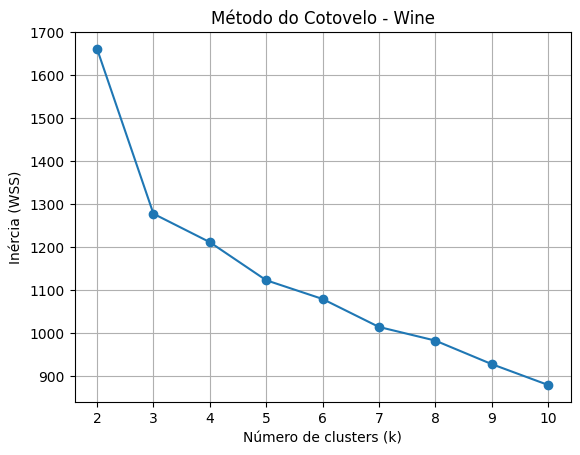

In [27]:
plt.plot(df_results["k"], df_results["Inércia (WSS)"], marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inércia (WSS)")
plt.title("Método do Cotovelo - Wine")
plt.grid(True)
plt.show()

### d) Determine o número ótimo de clusters considerando múltiplas métricas.

Para determinar o número ótimo de clusters (k), analisamos as quatro métricas calculadas:

1.  **Inércia (WSS - Within-Cluster Sum of Squares):** A inércia mede a coesão dos clusters. Espera-se que diminua à medida que `k` aumenta. No gráfico do Método do Cotovelo (`plt.plot(df_results["k"], df_results["Inércia (WSS)"], marker="o")`), observamos o "cotovelo" (ponto de inflexão) onde a taxa de diminuição da inércia se torna menos acentuada. Neste caso, há uma queda significativa de k=2 para k=3, e a curva começa a suavizar-se após k=3.

2.  **Silhouette Score:** Esta métrica mede quão bem os objetos são atribuídos aos seus próprios clusters em comparação com outros clusters. Valores mais altos indicam melhor separação e coesão. O **maior Silhouette Score é 0.284859 para k=3**.

3.  **Davies-Bouldin Index:** Este índice mede a semelhança média de cada cluster com o cluster mais similar, sendo que valores mais baixos indicam melhor separação entre os clusters. O **menor Davies-Bouldin Index é 1.38919 para k=3**.

4.  **Calinski-Harabasz Index:** Este índice é a razão da dispersão entre-clusters para a dispersão intra-cluster. Valores mais altos geralmente indicam clusters mais densos e bem separados. O **maior Calinski-Harabasz Index é 70.94 para k=3**.

Considerando todas as métricas, **o número ótimo de clusters para este dataset é k=3**. Este valor de `k` não só apresenta o "cotovelo" na inércia, mas também maximiza o Silhouette Score e o Calinski-Harabasz Index, e minimiza o Davies-Bouldin Index, indicando clusters bem definidos e separados.

## Tarefa 3.2: Comparação de Algoritmos
Implemente e compare:

1. K-Means (com k ótimo da Tarefa 3.1)

2. DBSCAN (teste diferentes valores de eps e min_samples)

3. Hierarchical Clustering (Agglomerative)

###a) Calcule o Silhouette Score para cada algoritmo.

In [34]:

# K-Means with optimal k=3
kmeans_optimal = KMeans(n_clusters=3, random_state=42, n_init="auto")
kmeans_labels = kmeans_optimal.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

# DBSCAN
dbscan_results = []
eps_values = [0.5, 0.7, 1.0, 1.2, 1.5]
min_samples_values = [3, 5, 7, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_scaled)

        # Number of clusters (ignoring noise points labeled -1)
        n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

        if n_clusters_ > 1:  # Silhouette score requires at least 2 clusters
            dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
            dbscan_results.append({
                'Algorithm': 'DBSCAN',
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': n_clusters_,
                'Silhouette Score': dbscan_silhouette
            })

df_dbscan_results = pd.DataFrame(dbscan_results)

# Agglomerative Clustering (Hierarchical)
# Let's try with 3 clusters, as k=3 was optimal for K-Means
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X_scaled)
agg_silhouette = silhouette_score(X_scaled, agg_labels)

# --- Create a summary table for comparison ---
algorithm_comparison = {
    'Algorithm': ['K-Means (k=3)', 'Agglomerative Clustering (n_clusters=3)'],
    'Silhouette Score': [kmeans_silhouette, agg_silhouette]
}

# Add the best DBSCAN result if available
if not df_dbscan_results.empty:
    # Find the best DBSCAN result based on Silhouette Score
    best_dbscan_row = df_dbscan_results.loc[df_dbscan_results['Silhouette Score'].idxmax()]
    algorithm_comparison['Algorithm'].append(f"DBSCAN (eps={best_dbscan_row['eps']}, min_samples={best_dbscan_row['min_samples']}, clusters={best_dbscan_row['n_clusters']})")
    algorithm_comparison['Silhouette Score'].append(best_dbscan_row['Silhouette Score'])
else:
    algorithm_comparison['Algorithm'].append('DBSCAN (no valid clusters found)')
    algorithm_comparison['Silhouette Score'].append(None)

df_comparison = pd.DataFrame(algorithm_comparison)

print("\n--- Comparativo de Silhouette Scores ---")
display(df_comparison.round(4))


--- Comparativo de Silhouette Scores ---


,Algorithm,Silhouette Score
0,K-Means (k=3),0.2849
1,Agglomerative Clustering (n_clusters=3),0.2774
2,"DBSCAN (eps=1.5, min_samples=3, clusters=8)",-0.2768


### b) Como os labels verdadeiros (cultivares) se comparam com os clusters encontrados?

--- Verificação de Qualidade dos Dados ---
Total de valores faltantes no dataset: 0
Nenhum valor faltante encontrado no dataset.

Potenciais outliers encontrados (método IQR):
  - malic_acid: 3 outliers
  - ash: 3 outliers
  - alcalinity_of_ash: 4 outliers
  - magnesium: 4 outliers
  - proanthocyanins: 2 outliers
  - color_intensity: 4 outliers
  - hue: 1 outliers
Linhas com potenciais outliers (primeiros 10 índices, se houver muitos): [25, 59, 69, 73, 78, 95, 110, 115, 121, 123]...


## Tarefa 3.3: Análise de Perfis dos Clusters

### a) Para a melhor solução de clusterização, calcule:

- Média de cada feature por cluster
- Desvio padrão de cada feature por cluster

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### b) Crie um gráfico de radar (spider chart) mostrando o perfil médio de cada cluster.

### c) Descreva as características de cada cluster em termos das features originais.